# Lab 3.04 - Statistical hypothesis testing

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

bakermiller = "#FF91AF"

## Exercise 1 - Navy recruits

The US Navy Recruiting Center knows from the past that recruits' heights are traditionally normally distributed with an average of 69 inches. The recruiting center wants to test whether the average height of this year's recruits exceeds 69 inches. To do this, it takes a random sample of 64 recruits from this year and records their height. The data is in the recruit.csv file.

1. Formulate the null hypothesis and the alternative hypothesis
2. Calculate the p-value
3. Draw a conclusion based on the previous step and answer the research question.

### Answers

- The p-value is 0.0017%
- There is sufficient reason to reject the H0 hypothesis. The p-value is less than 5%. It is almost impossible that the average height of the recruits would actually be 69 inches with the lengths of this sample.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/recruten.csv',
    sep=";", decimal=",")
df.head()

,Recruit,Height
0,1,74.5
1,2,74.0
2,3,74.6
3,4,69.8
4,5,76.0


***
- $H_0$: The average height of this year's recruits doesn't exceed 69 inches.
- $H_1$: The average height of this year's recruits does exceed 69 inches.

Checkmarks for $z$-test:
- [x] The sample is random
- [x] The sample size needs is sufficiently large ($n \geq 30$)
- [x] The test statistic has have a normal distribution  
- [ ] The standard deviation of the population, $\sigma$, is known

$\implies$ we should use $t$-test.

We try to reject the population mean being equal or higher so this is a right-tailed test.

for a right-tailed test, we use `sf`

In [63]:
heights = df.Height
n = len(heights)
mu = 69
m_sample = np.mean(heights)

s = np.std(heights, ddof=1)
alpha = 0.05

In [64]:
p = stats.t.sf(m_sample, loc = mu, scale = s / math.sqrt(n), df = n - 1)
print(f"p-value is: {p*100:.4f}%")
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H_0")

p-value is: 0.0017%
p < alpha: reject H0


***

## Exercise 2

The amount of rainfall on a certain island over the past 30 years has followed a normal distribution with mean 82.3 cm per year, and standard deviation 15.3. Scientists suspect that global warming has now increased the mean. A hypothesis test, of 5% level of significance is to be carried out to test the suspicion. The average rainfall on the island over the next 5 years will be used for the test.

1. Find the region of rejection for the test
2. What is the probability of making a Type I error? (false positive, aka H_0 rejected while true)
3. Find the probability of making a Type II error if the mean rainfall on the island has actually increased to 105 cm per year.

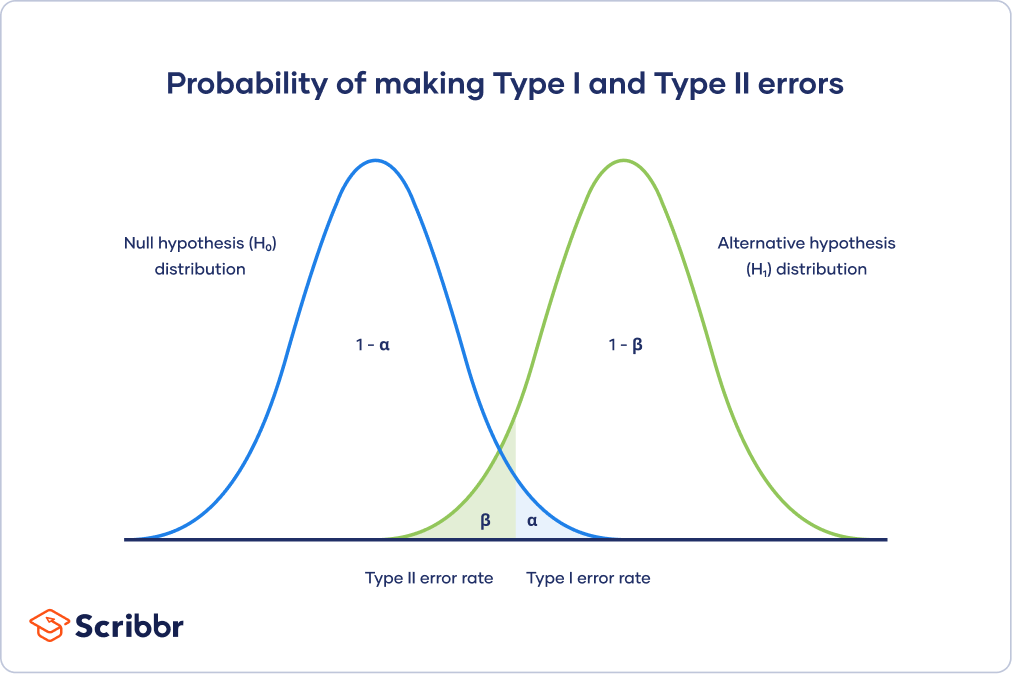

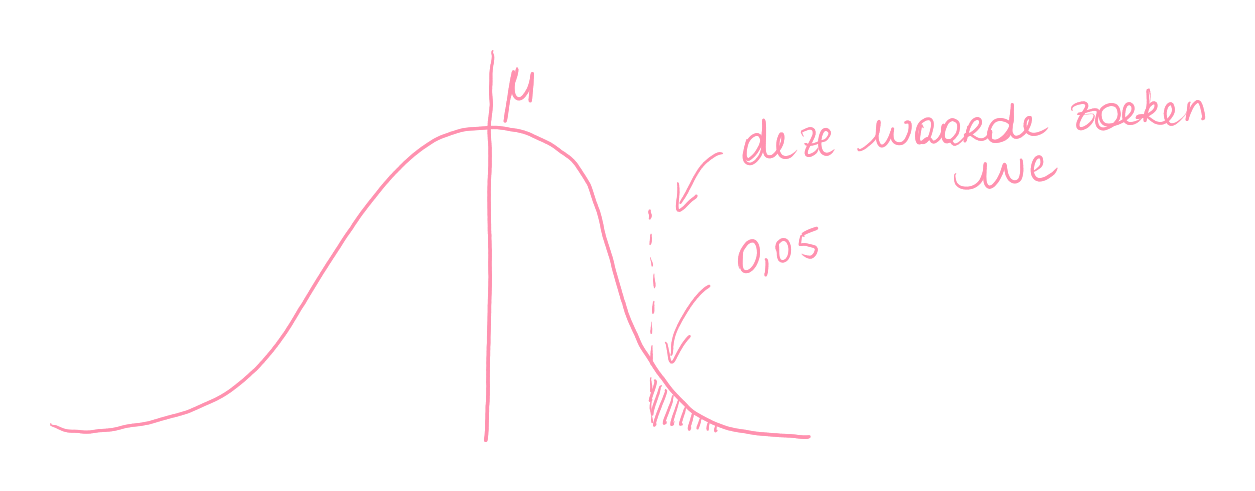

In [62]:
# H_0 = Mean has not increased
# H_1 = Mean has increased
mu = 82.3
sigma = 15.3
alpha = 0.05
n = 5
mu_1 = 105

# region of rejection for the test
SE = sigma / math.sqrt(n)
critical_value_t = stats.t.ppf(1 - alpha, loc=mu, scale=SE, df=n-1)
print(f"The region of rejection is [{critical_value_t:.4f}, +\\infty]")

# probability of making type I error?
print(f"Probability of making type-1 error: {alpha}")

# 3. Find the probability of making a Type II error if the mean rainfall on the island has actually increased to 105 cm per year.
beta = stats.t.cdf(critical_value_t, loc=mu_1, scale=SE, df=n-1)
print(f"Probability of falsely accepting H_0: {beta*100:.4f}%")

The region of rejection is [96.8869, +\infty]
Probability of making type-1 error: 0.05
Probability of falsely accepting H_0: 15.0678%


### Answers

1. The region of rejection is $\overline{x} \in ]96.8869, +\infty[$
2. The probability of a Type I error (when the original null hypothesis is still correct) is always given by $\alpha$, so for this case 5%.
3. The probability of a Type II error (when $\mu = 105$) $\beta \approx 0.1507$ or 15.0678 %

***

## Exercise 3

In the past, the time, in minutes for a particular minor medical procedure has been found to have mean 34.2 minutes and standard deviation 2.6. A new method is being considered in the hope that the average time would be shorter. A random sample of 50 procedures using the new method is taken and the mean time is found to be 33.5 minutes.  
Carry out a test at the 5% level of significance to see whether the mean time for the procedure has decreased.

### Answers

- p-value: 0.02847 => p < a: reject H0
- Critical value g ≃ 33.595 => sample mean = 33.500 < g = 33.595: reject H0

In [ ]:
mu = 34.2
s = 2.6
n = 50
sample_m = 33.5
SE = s / np.sqrt(n)
alpha = 0.05

# p_value
p_val = stats.norm.cdf(sample_m, loc=mu, scale=SE)
print(f"p-value: {p_val*100:.5f}%")
print(f"p-value: {p}")
if(p_val < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")
    
    #critical_value_t = stats.t.ppf(1 - alpha, loc=mu, scale=SE, df=n-1)

# critical value
critical_value = stats.norm.ppf(alpha, loc=mu, scale=SE) # hier alpha en niet 1-alpha omdat het over linkerkant gaat
critical_value

p-value: 2.84714%
p-value: 1.7080964227138955e-05
p < alpha: reject H0


np.float64(33.595194680088134)

***

## Exercise 4

The stopping distance (in meters) was measured of a truck traveling at 32 km/h under specific conditions. The report stated that under these conditions the maximum permitted stopping distance is 9.15 meters. 
The stopping distance is normally distributed. The values measured are [9.78, 9.33, 9.57, 9.26, 9.45, 9.72]. Do these values suggest that the actual stopping distance is greater than 9.15 meters?
Perform a test with 1% significance level to answer this question. 
Why is a 1% significance level test used in this case instead of a 5% significance level test? 

### Answers
p-value: 0.00381 => p < a: reject H0  
Critical value g ≃ 9.437   
sample mean = 9.5183 > g = 9.437: reject H0

In [101]:
mu = 9.15
samples = [9.78, 9.33, 9.57, 9.26, 9.45, 9.72]
n = len(samples)
sample_m = np.mean(samples)
alpha = 0.01
s = np.std(samples, ddof=1)      # Use ddof=1 for sample std!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! You must use ddof=1 when you're calculating the sample standard deviation to estimate the population standard deviation from a sample.
SE = s / np.sqrt(n)

crit = stats.t.ppf(1-alpha, loc=mu, scale=SE, df=n-1)
p = stats.t.sf(sample_m, loc=mu, scale=SE, df=n-1)

print(f"p-value: {p:.5f} => reject H_0")
print(f"Critical value: {crit:.3f}")
print(f"sample mean {sample_m:.4f} > g => reject H0")

p-value: 0.00381 => reject H_0
Critical value: 9.437
sample mean 9.5183 > g => reject H0


***

## Exercise 5 - rlanders.csv, revisited



In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])
df.head()

,Gender,Money,Days,Months,Count,Survey
ID,,,,,,
1,Female,440,29,11,35,3
2,Female,503,23,10,52,3
3,Male,412,16,11,55,3
4,Male,587,25,9,28,5
5,Male,525,30,11,41,4



The variable *Money* represents a gross annual salary ($\times 100$\$). We assume this variable has a mean of $\mu = 500$ with standard deviation $\sigma = 98$. If we calculate the sample mean over the entire dataset (do this yourself!), it seems to support our assumptions. But what if we looked at
men and women separately (variable *Gender*)?

First, visualise this case by plotting a kernel density estimate of the variable *Money* over the entire dataset and split up according to *Gender*. Draw a vertical line for the assumed population mean and sample means.



<Axes: xlabel='Money', ylabel='Density'>

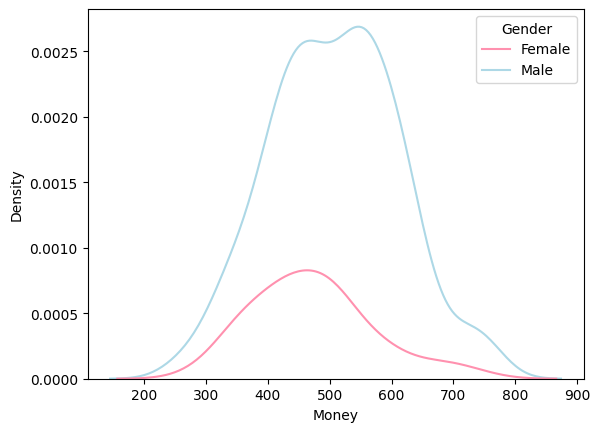

In [110]:
sns.kdeplot(data=df, hue='Gender', x='Money', palette=[bakermiller, "lightblue"])



Use an appropriate statistical test to verify the statements below, usinge a significance level of $\alpha = 5\%$. For each statement, calculate the critical value(s) and the $p$-value.

1. The average gross annual salary of men seems higher than the average. Is it also significantly higher?


In [134]:
# H0: it's not significantly higher P(X < mean) > 0.05
# H1: it's significantly higher 

men = df[df.Gender == 'Male']
n = len(men.Money)
mu = 500
s = 98
sample_m = np.mean(men.Money)
alpha = 0.05
SE = s / np.sqrt(n)

g = stats.norm.ppf(1-alpha, loc=mu, scale=SE)
print(g)
print(sample_m)
print("can't reject")

511.45567640449514
507.5353535353535
can't reject


   
2. The average gross annual salary of women seems lower. Is it significantly lower?


In [136]:
# H0: it's not significantly higher P(X < mean) > 0.05
# H1: it's significantly higher 

women = df[df.Gender == 'Female']
n = len(women.Money)
mu = 500
s = 98
sample_m = np.mean(women.Money)
alpha = 0.05
SE = s / np.sqrt(n)

g = stats.norm.ppf(alpha, loc=mu, scale=SE)
print(g)
print(sample_m)
print("can reject")

477.64618457402185
472.0576923076923
can reject


   
3. Calculate the region of acceptance for the average gross annual salary for the sample (men and women combined). In this case we want to verify if the sample mean is significantly different from the expected value, but it can be lower or higher.


In [149]:
n = len(df)
SE = s / np.sqrt(n)

z_critical = stats.norm.ppf(1 - alpha/2)

lower_bound = mu - z_critical * SE
upper_bound = mu + z_critical * SE

print(f"Region of acceptance: [{lower_bound:.3f}, {upper_bound:.3f}]")

Region of acceptance: [487.852, 512.148]



### Answers

1. Sample mean: $\overline{x} \approx 507.535$, critical value: $g \approx 511.456$, $p \approx 0.1396$. We can **not** reject the null hypothesis. The gross annual income of men in this sample is not significantly higher than expected.
2. Sample mean: $\overline{x} \approx 472.058$, critical value: $g \approx 477.646$, $p \approx 0.0199$. We can reject the null hypothesis. The gross annual income of women in this sample is significantly lower than expected.
3. The acceptance region is the interval $[487.852, 512.148]$.

***


## Exercise 6 - Binding recommendation on continuation of studies 

It is being said that introducing a “binding recommendation on continuation of studies” (refusing enrollment in the next academic year if a student did not complete a certain level of credits, NL: "bindend studie-advies, BSA") has a positive effect on the study efficiency and success rate. Before the introduction of binding recommendations, the number of completed credits per student per year was 44 with a standard deviation of 6.2. After the introduction, a sample of 72 random students has an average number of completed credits of 46.2.



In [193]:
mu = 44
s = 6.2
n = 72
sample_m = 46.2
SE = s / math.sqrt(n)
alpha = 0.025


1. Draw a plot of this case with the probability density for the sample mean, and a vertical line for the population mean and actual sample mean.


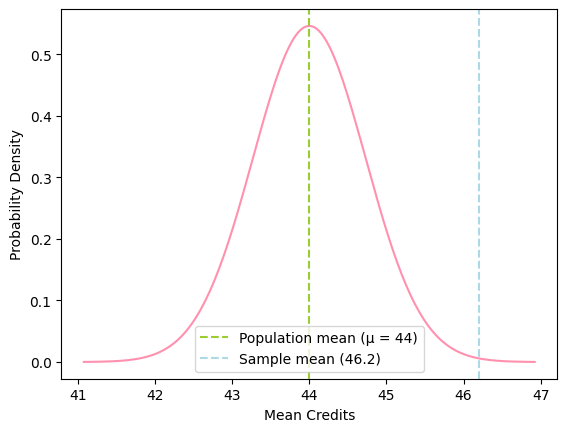

In [170]:
# x range centered around mu (or sample mean if you prefer)
x = np.linspace(mu - 4 * SE, mu + 4 * SE, num=201)
y = stats.norm.pdf(x, mu, SE)

# Plot
plt.plot(x, y, color=bakermiller)
plt.axvline(mu, color="yellowgreen", linestyle="--", label="Population mean (μ = 44)")
plt.axvline(sample_m, color="lightblue", linestyle="--", label="Sample mean (46.2)")
plt.xlabel("Mean Credits")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


   
2. Test whether there is evidence that the introduction of binding recommendations has improved the success rate among students. Which test do you use in this case? Formulate the null hypothesis and alternative hypothesis.

- Test: z-test
- $H_0$: binding recommendations dont influence results positively
- $H_1$: binding recommendations do influence results positively


   
3. Calculate the critical value for a significance level of $\alpha = 2.5\%$.


In [195]:
print("with critical value")
g = stats.norm.isf(alpha, loc=mu, scale=SE)  # this is RIGHT for right-tail
print(g)

with critical value
45.432100618494665


   
4. Calculating the $p$-value.


In [196]:
print("with p-value")
p = stats.norm.sf(sample_m, loc=mu, scale=SE)
p = stats.t.sf(m_sample, loc = mu, scale = s / math.sqrt(n), df = n - 1)
print(f"p-value: {p}")
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

with p-value
p-value: 4.6419256570078885e-48
p < alpha: reject H0


   
5. Interpret the meaning of $\alpha$ being 2.5%.


You accept that there is a 2.5% probability of wrongly concluding that the binding recommendation (BSA) improved study success (i.e., average credits increased), when in reality it did not. It's important that students dont uselessly get barred from continuing their studies.



### Answers

1. $g \approx 45.4 < x = 46.2$.

    $x$ is inside the critical region, so we can reject the null hypothesis. Therefore, we can assume that binding recommendation on continuation of studies does increase the success rate.

2. $P(M > 46.2) \approx 0.0013 < \alpha = 0.025$. The probability value is smaller than the significance level, so we can reject the null hypothesis.
3. $\alpha$ represents the probability of rejecting a true null hypothesis $H_0$. In other words, there is a 2.5% chance that you wrongly conclude that the success rate has increased.